In [46]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import skimage
from skimage import exposure
from skimage.util import random_noise
from skimage import transform
from skimage import io

In [23]:
path = "/Users/rampageyao/Desktop/test_bb/1/0001.jpg"

(112, 112, 3)


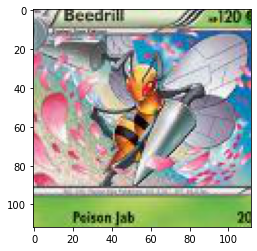

In [29]:
img = mpimg.imread(path)
print(img.shape)
plt.imshow(img)

In [52]:
h = np.fliplr(img)
v = np.flipud(img)
t = transform.rotate(img, random.uniform(-30,30))
n = random_noise(img, mode='s&p', clip=True)

In [29]:
# coding = utf-8
# ! pip install opencv-contrib-python
import cv2
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageFilter
from numpy.ma import array
import numpy as np
import os
# 批量处理代码 i.e. process in batch

def gaussian_noise(img, mean=0, sigma=0.1):
    # int -> float (標準化)
    img = img / 255
    # 隨機生成高斯 noise (float + float)
    noise = np.random.normal(mean, sigma, img.shape)
    # noise + 原圖
    gaussian_out = img + noise
    # 所有值必須介於 0~1 之間，超過1 = 1，小於0 = 0
    gaussian_out = np.clip(gaussian_out, 0, 1)

    # 原圖: float -> int (0~1 -> 0~255)
    gaussian_out = np.uint8(gaussian_out*255)
    # noise: float -> int (0~1 -> 0~255)
    #noise = np.uint8(noise*255)
    return gaussian_out


def operate(currentPath, filename, targetPath, color_blackwhite = False, contrast_high = False, contrast_low = False, blur = False, bright_high = True, bright_low = True, color_high = True, color_low = True, sharpness = True, x_reshape = True, y_reshape = True, x_left = False, x_right = False, y_up = False, y_down = True, rotate = True, noise = True):
    if ".jpg" in currentPath:
        # 读取图像 i.e. read
        image = Image.open(currentPath)
        image_cv = cv2.imread(currentPath)
        
        if bright_high == True:
            # 增强亮度 i.e. change brightness bh_
            enh_bri = ImageEnhance.Brightness(image)
            brightness = 1.2
            image_brightened_h = enh_bri.enhance(brightness)
            # image_brightened_h.show()
            image_brightened_h.save(targetPath + 'brightness_high' + filename)  # 保存

        if bright_low == True:
            # 降低亮度 i.e. change brightness bl_
            enh_bri_low = ImageEnhance.Brightness(image)
            brightness = 0.8
            image_brightened_low = enh_bri_low.enhance(brightness)
            # image_brightened_low.show()
            image_brightened_low.save(targetPath + 'brightness_low' + filename)

        if color_blackwhite == True:
            # 改变色度 i.e. change color co_
            enh_col = ImageEnhance.Color(image)
            color = 0.0
            image_colored = enh_col.enhance(color)
            # image_colored.show()
            image_colored.save(targetPath + 'color_black_white_' + filename)

        if color_high == True:
            # 改变色度 i.e. change color co_
            enh_col = ImageEnhance.Color(image)
            color = 1.7
            image_colored = enh_col.enhance(color)
            # image_colored.show()
            image_colored.save(targetPath + 'color_high_' + filename)

        if color_low == True:
            # 改变色度 i.e. change color co_
            enh_col = ImageEnhance.Color(image)
            color = 0.7
            image_colored = enh_col.enhance(color)
            # image_colored.show()
            image_colored.save(targetPath + 'color_low' + filename)

        if contrast_high == True:
            # 改变对比度 i.e. change color cont_
            enh_con = ImageEnhance.Contrast(image)
            contrast = 1.15
            image_contrasted = enh_con.enhance(contrast)
            # image_contrasted.show()
            image_contrasted.save(targetPath + 'contrast_high' + filename)

        if contrast_low == True:
            # 改变对比度 i.e. change color cont_
            enh_con = ImageEnhance.Contrast(image)
            contrast = 0.85
            image_contrasted = enh_con.enhance(contrast)
            # image_contrasted.show()
            image_contrasted.save(targetPath + 'contrast_low' + filename)

        if sharpness == True:
            # 改变锐度 i.e. change sha sha_
            enh_sha = ImageEnhance.Sharpness(image)
            sharpness = 3
            image_sharp = enh_sha.enhance(sharpness)
            # image_sharp.show()
            image_sharp.save(targetPath + 'sharpness_' + filename)

        if blur == True:
            # filter
            image_blur1 = image.filter(ImageFilter.GaussianBlur(radius=0.9))
            #print(np.shape(image_blur1))
            image_blur1.save(targetPath + 'blur1_' + filename)

        # y方向上的缩放 i.e. scale in y yre_
        # image.show()
        #w = image.width
        #h = image.height
        ##print(w, h)
        ##out_ww = image.resize((w, h + 40))  # 拉伸成高为h的正方形
        # out_ww.show()
        ##out_ww_1 = np.array(out_ww)
        ##out_w_2 = out_ww_1[30:(h - 10), 0:w]  # 开始的纵坐标，开始的横坐标
        ##out_w_2 = Image.fromarray(out_w_2)
        # out_w_2.show()
        ##out_w_2.save(targetPath + 'yre_' + filename)

        if x_reshape == True:
            # x方向上的缩放 i.e. scale in x xre_
            # image.show()
            w = image.width
            h = image.height
            out_hh = image.resize((w + 40, h))  # 拉伸成宽为w的正方形,width,height
            # out_hh.show()
            out_hh_1 = array(out_hh)
            out_h_2 = out_hh_1[0:h, 20:(w + 20)]
            #print(np.shape(out_h_2))
            out_h_2 = Image.fromarray(out_h_2)
            # out_h_2.show()
            out_h_2.save(targetPath + 'xre_' + filename)
        
        if y_reshape == True:
            # y方向上的缩放 i.e. scale in x xre_
            # image.show()
            w = image.width
            h = image.height
            out_hh = image.resize((w, h + 40))  # 拉伸成宽为w的正方形,width,height
            # out_hh.show()
            out_hh_1 = array(out_hh)
            out_h_2 = out_hh_1[20:(h+20), 0:w]
            #print(np.shape(out_h_2))
            out_h_2 = Image.fromarray(out_h_2)
            # out_h_2.show()
            out_h_2.save(targetPath + 'yre_' + filename)

        if x_left == True:
            # x左方向的平移 i.e. move to left xl_
            # 平移矩阵[[1,0,-10]，[0,1,-12]]
            # image.show()
            w = image.width
            h = image.height
            M = np.array([[1, 0, -20], [0, 1, 0]], dtype=np.float32)
            image_cv_change = cv2.warpAffine(image_cv, M, (w, h))
            image_cv_change_RGB = cv2.cvtColor(image_cv_change, cv2.COLOR_BGR2RGB)
            image_cv_change = Image.fromarray(image_cv_change_RGB)
            # image_cv_change.show()
            image_cv_change.save(targetPath + 'x_left_' + filename)

        if x_right == True:
            # x右方向的平移
            # image.show()
            w = image.width
            h = image.height
            M = np.array([[1, 0, 20], [0, 1, 0]], dtype=np.float32)
            image_cv_change = cv2.warpAffine(image_cv, M, (w, h))
            image_cv_change_RGB = cv2.cvtColor(image_cv_change, cv2.COLOR_BGR2RGB)
            image_cv_change = Image.fromarray(image_cv_change_RGB)
            # image_cv_change.show()
            image_cv_change.save(targetPath + 'x_right_' + filename)

        if y_down == True:
            # y down 
            # 平移矩阵[[1,0,-10]，[0,1,-12]]
            # image.show()
            w = image.width
            h = image.height
            M = np.array([[1, 0, 0], [0, 1, 20]], dtype=np.float32)
            image_cv_change = cv2.warpAffine(image_cv, M, (w, h))
            image_cv_change_RGB = cv2.cvtColor(image_cv_change, cv2.COLOR_BGR2RGB)
            image_cv_change = Image.fromarray(image_cv_change_RGB)
            #print(np.shape(image_cv_change))
            # image_cv_change.show()
            image_cv_change.save(targetPath + 'y_down_' + filename)

        if y_up == True:
            # y up
            # 平移矩阵[[1,0,-10]，[0,1,-12]]
            # image.show()
            w = image.width
            h = image.height
            M = np.array([[1, 0, 0], [0, 1, -20]], dtype=np.float32)
            image_cv_change = cv2.warpAffine(image_cv, M, (w, h))
            image_cv_change_RGB = cv2.cvtColor(image_cv_change, cv2.COLOR_BGR2RGB)
            image_cv_change = Image.fromarray(image_cv_change_RGB)
            #print(np.shape(image_cv_change))
            # image_cv_change.show()
            image_cv_change.save(targetPath + 'y_up_' + filename)

        if rotate == True:
            # rotate
            image_rotate1 = image.rotate(30)
            #print(np.shape(image_rotate1))
            image_rotate1.save(targetPath + 'rotate_30_' + filename)
            image_rotate2 = image.rotate(-30)
            #print(np.shape(image_rotate2))
            image_rotate2.save(targetPath + 'rotate_-30_' + filename)
            imgae_mirror = image.transpose(Image.FLIP_LEFT_RIGHT)
            #print(np.shape(image_rotate2))  
            imgae_mirror.save(targetPath + 'mirror_' + filename)

        if noise == True:
            # noise
            image_noise = gaussian_noise(image_cv)
            #print(np.shape(image_noise))
            cv2.imwrite(targetPath + 'noise_' + filename, image_noise)

In [21]:
rootdir = '/Users/rampageyao/Desktop/test_bb/1' # 指明被遍历的文件夹 for test
targetPath = '/Users/rampageyao/Desktop/test_bb/test/'

In [ ]:
# blur = False, color_blackwhite = False, 
# sharpness = False
# bright_high = True, bright_low = True, color_blackwhite = True, color_high = True, color_low = True, contrast_high = True, contrast_low = True, sharpness = True, blur = True, x_reshape = True, y_reshape = True, x_left = True, x_right = True, y_up = True, y_down = True,rotate = True, noise = True)

In [62]:
# 184
rootdir = '/Users/rampageyao/Desktop/TUM Course/deep learning/Assignment 1/pokemon/train/bug' 
targetPath = '/Users/rampageyao/Desktop/augmented/bug/'

In [27]:
# change the path above for each class and run this code to augment data
for parent, dirnames, filenames in os.walk(rootdir):
    for filename in filenames:
        #print(filename)
        # print('parent is:' + parent)
        #print('filename is: ' + filename)
        # 把文件名添加到一起后输出 i.e. add the name and output
        currentPath = os.path.join(parent, filename)
        # print('the full name of file is :' + currentPath)
        operate(currentPath, filename, targetPath)

In [64]:
# 195
rootdir = '/Users/rampageyao/Desktop/TUM Course/deep learning/Assignment 1/pokemon/train/electric' 
targetPath = '/Users/rampageyao/Desktop/augmented/electric/'

In [28]:
# change the path above for each class and run this code to augment data
for parent, dirnames, filenames in os.walk(rootdir):
    for filename in filenames:
        #print(filename)
        # print('parent is:' + parent)
        #print('filename is: ' + filename)
        # 把文件名添加到一起后输出 i.e. add the name and output
        currentPath = os.path.join(parent, filename)
        # print('the full name of file is :' + currentPath)
        operate(currentPath, filename, targetPath)

In [66]:
# 234
rootdir = '/Users/rampageyao/Desktop/TUM Course/deep learning/Assignment 1/pokemon/train/fighting' 
targetPath = '/Users/rampageyao/Desktop/augmented/fighting/'

In [70]:
# change the path above for each class and run this code to augment data
for parent, dirnames, filenames in os.walk(rootdir):
    for filename in filenames:
        #print(filename)
        # print('parent is:' + parent)
        #print('filename is: ' + filename)
        # 把文件名添加到一起后输出 i.e. add the name and output
        currentPath = os.path.join(parent, filename)
        # print('the full name of file is :' + currentPath)
        operate(currentPath, filename, targetPath)

In [71]:
# 236
rootdir = '/Users/rampageyao/Desktop/TUM Course/deep learning/Assignment 1/pokemon/train/fire' 
targetPath = '/Users/rampageyao/Desktop/augmented/fire/'

In [72]:
# change the path above for each class and run this code to augment data
for parent, dirnames, filenames in os.walk(rootdir):
    for filename in filenames:
        #print(filename)
        # print('parent is:' + parent)
        #print('filename is: ' + filename)
        # 把文件名添加到一起后输出 i.e. add the name and output
        currentPath = os.path.join(parent, filename)
        # print('the full name of file is :' + currentPath)
        operate(currentPath, filename, targetPath)

In [73]:
# 263
rootdir = '/Users/rampageyao/Desktop/TUM Course/deep learning/Assignment 1/pokemon/train/flying' 
targetPath = '/Users/rampageyao/Desktop/augmented/flying/'

In [74]:
# change the path above for each class and run this code to augment data
for parent, dirnames, filenames in os.walk(rootdir):
    for filename in filenames:
        #print(filename)
        # print('parent is:' + parent)
        #print('filename is: ' + filename)
        # 把文件名添加到一起后输出 i.e. add the name and output
        currentPath = os.path.join(parent, filename)
        # print('the full name of file is :' + currentPath)
        operate(currentPath, filename, targetPath)

In [75]:
# 284
rootdir = '/Users/rampageyao/Desktop/TUM Course/deep learning/Assignment 1/pokemon/train/grass'
targetPath = '/Users/rampageyao/Desktop/augmented/grass/'

In [76]:
# change the path above for each class and run this code to augment data
for parent, dirnames, filenames in os.walk(rootdir):
    for filename in filenames:
        #print(filename)
        # print('parent is:' + parent)
        #print('filename is: ' + filename)
        # 把文件名添加到一起后输出 i.e. add the name and output
        currentPath = os.path.join(parent, filename)
        # print('the full name of file is :' + currentPath)
        operate(currentPath, filename, targetPath)

In [77]:
# 259
rootdir = '/Users/rampageyao/Desktop/TUM Course/deep learning/Assignment 1/pokemon/train/ground' 
targetPath = '/Users/rampageyao/Desktop/augmented/ground/'

In [78]:
# change the path above for each class and run this code to augment data
for parent, dirnames, filenames in os.walk(rootdir):
    for filename in filenames:
        #print(filename)
        # print('parent is:' + parent)
        #print('filename is: ' + filename)
        # 把文件名添加到一起后输出 i.e. add the name and output
        currentPath = os.path.join(parent, filename)
        # print('the full name of file is :' + currentPath)
        operate(currentPath, filename, targetPath)

In [79]:
# 148
rootdir = '/Users/rampageyao/Desktop/TUM Course/deep learning/Assignment 1/pokemon/train/phychic'
targetPath = '/Users/rampageyao/Desktop/augmented/phychic/'

In [80]:
# change the path above for each class and run this code to augment data
for parent, dirnames, filenames in os.walk(rootdir):
    for filename in filenames:
        #print(filename)
        # print('parent is:' + parent)
        #print('filename is: ' + filename)
        # 把文件名添加到一起后输出 i.e. add the name and output
        currentPath = os.path.join(parent, filename)
        # print('the full name of file is :' + currentPath)
        operate(currentPath, filename, targetPath)

In [81]:
# 174
rootdir = '/Users/rampageyao/Desktop/TUM Course/deep learning/Assignment 1/pokemon/train/poison' 
targetPath = '/Users/rampageyao/Desktop/augmented/poison/'

In [82]:
# change the path above for each class and run this code to augment data
for parent, dirnames, filenames in os.walk(rootdir):
    for filename in filenames:
        #print(filename)
        # print('parent is:' + parent)
        #print('filename is: ' + filename)
        # 把文件名添加到一起后输出 i.e. add the name and output
        currentPath = os.path.join(parent, filename)
        # print('the full name of file is :' + currentPath)
        operate(currentPath, filename, targetPath)

In [83]:
# 390
rootdir = '/Users/rampageyao/Desktop/TUM Course/deep learning/Assignment 1/pokemon/train/water' 
targetPath = '/Users/rampageyao/Desktop/augmented/water/'

In [85]:
# change the path above for each class and run this code to augment data
for parent, dirnames, filenames in os.walk(rootdir):
    for filename in filenames:
        #print(filename)
        # print('parent is:' + parent)
        #print('filename is: ' + filename)
        # 把文件名添加到一起后输出 i.e. add the name and output
        currentPath = os.path.join(parent, filename)
        # print('the full name of file is :' + currentPath)
        operate(currentPath, filename, targetPath, sharpness = False, bright_high = False, bright_low = False)